## 降维算法：主成分分析(PCA)

### 常用降维技术
1. 主成分分析 PCA
2. 因子分析 Factor Analysis
3. 独立成分分析 ICA

### PCA原理
- 数据从原来的坐标系转换到新的坐标系，新坐标系的选择是由数据本身决定的。第一个新坐标轴选择的是原始数据中方差最大的方向(即数据差异性最大的方向)，第二个新坐标轴选择与第一个新坐标轴正交且具有最大方差的方向，以此类推，共建立与原始数据特征数目相等的新坐标轴。
- 我们会发现，大部分方差都包含在最前面的几个新坐标轴中，因此我们可以忽略余下的坐标轴，从而实现降维。（方差大代表不同数据之间的差异大，即，包含的可区分信息量大）
- 注意，PCA降维后，原始数据被映射到了新坐标系，不是原始值了。

### PCA优缺点
- 优点：降低数据复杂性，识别最重要的多个特征
- 缺点：
    1. 不一定需要，且可能损失有用信息--> <font color=red size=3>？什么时候需要使用PCA</font>
    2. PCA需要将所有数据集放入内存，若数据集较大，内存处理效率低，此时需要使用其他方法来寻找特征值-->SVD+PCA
- 适用数据类型：数值型

### PCA过程
1. 去除平均值(防止协方差计算中出现乘以0的情况)
2. 计算协方差矩阵np.cov()，并计算该矩阵的特征值和特征向量nplinalg.eig()
3. 将特征值降序排序，保留前N个特征值对应的特征向量(N为PCA保留的特征数，人为设定)
4. 将原始数据转换到这N个特征向量构建的新空间中(矩阵乘法：原始数据\*特征向量)
5. 将转换到新空间的原始数据，映射到新坐标系中，得到降维之后的数据集


- **协方差**
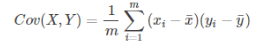

- **协方差矩阵**
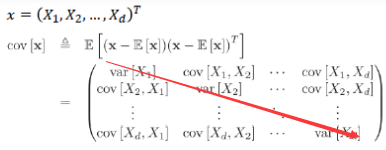

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#设置不显示warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
def loadDataSet(fileName,delim='\t'):
    fr=open(fileName)
    stringArr=[line.strip().split(delim) for line in fr.readlines()]
    datArr=[list(map(float,line)) for line in stringArr]
    return np.mat(datArr)

"""
PCA主函数，dataMat为原始数据集，topNfeat为设定的降维后的特征数
lowDemData为原始数据映射到新空间，相当于在新坐标系下各数据点的投影坐标，是用于进行下一步数据挖掘的数据
reconMat为降维后的数据集，相当于新坐标系在原坐标系下的坐标值
"""
def pca(dataMat,topNfeat=999999):
    meanVals=np.mean(dataMat,axis=0) #求dataMat各列均值
    meanRemoved=dataMat-meanVals #减去原始数据中的均值，避免协方差计算中出现乘以0的情况
    covMat=np.cov(meanRemoved,rowvar=0) #rowvar=0-->以列代表一个变量，计算各列之间的协方差
    eigVals,eigVects=np.linalg.eig(np.mat(covMat)) #协方差矩阵的特征值和特征向量
    eigValInd=np.argsort(eigVals) 
    eigValInd=eigValInd[:-(topNfeat+1):-1] #对升序排序结果从后往前取topNfeat个值
    redEigVects=eigVects[:,eigValInd] #取选定特征值对应的特征向量，从而转换原始数据
    lowDemData=meanRemoved*redEigVects #将原始数据转换到新空间
    reconMat=(lowDemData*redEigVects.T)+meanVals #降维后的数据集
    return lowDemData,reconMat

In [3]:
dataMat=loadDataSet(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch13\testSet.txt')
dataMat

matrix([[10.235186, 11.321997],
        [10.122339, 11.810993],
        [ 9.190236,  8.904943],
        ...,
        [ 9.854922,  9.201393],
        [ 9.11458 ,  9.134215],
        [10.334899,  8.543604]])

In [15]:
meanVals=np.mean(dataMat,axis=0) 
meanRemoved=dataMat-meanVals 
covMat=np.cov(meanRemoved,rowvar=0) 
eigVals,eigVects=np.linalg.eig(np.mat(covMat))
eigValInd=np.argsort(eigVals)
eigValInd=eigValInd[:-2:-1]
redEigVects=eigVects[:,eigValInd]
redEigVects

matrix([[-0.52045195],
        [-0.85389096]])

In [19]:
meanRemoved*redEigVects*redEigVects.T+meanVals

matrix([[10.37044569, 11.23955536],
        [10.55719313, 11.54594665],
        [ 9.01323877,  9.01282393],
        ...,
        [ 9.32502753,  9.52436704],
        [ 9.0946364 ,  9.14637075],
        [ 9.16271152,  9.2580597 ]])

In [4]:
lowMat,reconMat=pca(dataMat,1)
print("PCA降维到1维")
print (" 原始数据映射到新空间：",'\n',lowMat[:5],'\n',"降维后的数据集：",'\n',reconMat[:5])
print(np.shape(lowMat),'\n',np.shape(reconMat))

PCA降维到1维
 原始数据映射到新空间： 
 [[-2.51033597]
 [-2.86915379]
 [ 0.09741085]
 [-0.76778222]
 [ 1.02715333]] 
 降维后的数据集： 
 [[10.37044569 11.23955536]
 [10.55719313 11.54594665]
 [ 9.01323877  9.01282393]
 [ 9.46353019  9.75160448]
 [ 8.52935248  8.21892524]]
(1000, 1) 
 (1000, 2)


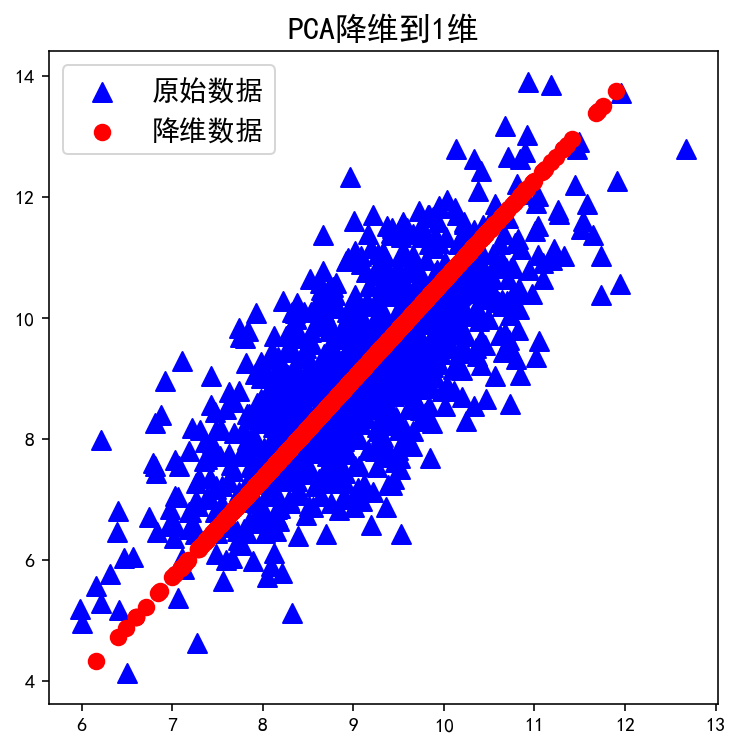

In [53]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111)
ax.scatter(dataMat[:,0].flatten().A[0],dataMat[:,1].flatten().A[0],marker="^",c="blue",s=90,label="原始数据")
ax.scatter(reconMat[:,0].flatten().A[0],reconMat[:,1].flatten().A[0],marker="o",c="red",s=60,label="降维数据")
plt.title("PCA降维到1维",fontsize=16)
plt.legend(fontsize=14)

### 测试：半导体数据集

In [59]:
secom=loadDataSet(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch13\secom.data',' ')
secom[:5],np.shape(secom)

(matrix([[3.0309300e+03, 2.5640000e+03, 2.1877333e+03, ...,           nan,
                    nan,           nan],
         [3.0957800e+03, 2.4651400e+03, 2.2304222e+03, ..., 2.0100000e-02,
          6.0000000e-03, 2.0820450e+02],
         [2.9326100e+03, 2.5599400e+03, 2.1864111e+03, ..., 4.8400000e-02,
          1.4800000e-02, 8.2860200e+01],
         [2.9887200e+03, 2.4799000e+03, 2.1990333e+03, ..., 1.4900000e-02,
          4.4000000e-03, 7.3843200e+01],
         [3.0322400e+03, 2.5028700e+03, 2.2333667e+03, ..., 1.4900000e-02,
          4.4000000e-03, 7.3843200e+01]]), (1567, 590))

In [64]:
#由于半导体数据集中含有大量空值，我们用均值填充
def replaceNanWithMean():
    datMat=loadDataSet(r'D:\DM\python\data\MLiA_SourceCode\machinelearninginaction\Ch13\secom.data',' ')
    numFeat=np.shape(datMat)[1]
    for i in range(numFeat): #遍历数据集各特征，计算各特征数组非空非零元素均值，填充到空元素
        meanVal=np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i].A))[0],i])
        datMat[np.nonzero(np.isnan(datMat[:,i].A))[0],i]=meanVal
    return datMat

In [67]:
secom_wash=replaceNanWithMean()
secom_wash[:5]

matrix([[3.03093000e+03, 2.56400000e+03, 2.18773330e+03, ...,
         1.64749042e-02, 5.28333333e-03, 9.96700663e+01],
        [3.09578000e+03, 2.46514000e+03, 2.23042220e+03, ...,
         2.01000000e-02, 6.00000000e-03, 2.08204500e+02],
        [2.93261000e+03, 2.55994000e+03, 2.18641110e+03, ...,
         4.84000000e-02, 1.48000000e-02, 8.28602000e+01],
        [2.98872000e+03, 2.47990000e+03, 2.19903330e+03, ...,
         1.49000000e-02, 4.40000000e-03, 7.38432000e+01],
        [3.03224000e+03, 2.50287000e+03, 2.23336670e+03, ...,
         1.49000000e-02, 4.40000000e-03, 7.38432000e+01]])

In [68]:
lowMat2,reconMat2=pca(secom_wash,6)
print("PCA降维到6维")
print (" 原始数据映射到新空间：",'\n',lowMat2[:5],'\n',"降维后的数据集：",'\n',reconMat2[:5])
print(np.shape(lowMat2),'\n',np.shape(reconMat2))

PCA降维到6维
 原始数据映射到新空间： 
 [[5183.89616507 3022.64772377 -688.38624272   57.92893142 -349.28054496
   -41.1987254 ]
 [1866.69728394 4021.63902468 1505.57352582  199.23992427  640.23125989
   -46.32552024]
 [3154.74165413 3461.98581552 1855.44207771 -153.33360802  139.53362841
   -29.23236202]
 [1983.43354963  598.03580369 1509.10287245 -571.94307328 -286.11375631
   -68.00851341]
 [3926.09409943 2343.84198466 -134.61945766 -187.94933028  134.32280808
   -54.67492567]] 
 降维后的数据集： 
 [[3.01066325e+03 2.49406731e+03 2.20213724e+03 ... 1.67202673e-02
  5.36050927e-03 1.01506849e+02]
 [3.01255070e+03 2.49352915e+03 2.20206516e+03 ... 1.63462557e-02
  5.28251139e-03 9.73646175e+01]
 [3.01275173e+03 2.49627540e+03 2.20235917e+03 ... 1.64522016e-02
  5.31579865e-03 1.00869145e+02]
 [3.01506445e+03 2.49899471e+03 2.20144281e+03 ... 1.64651826e-02
  5.30412552e-03 1.02844098e+02]
 [3.01232093e+03 2.49362799e+03 2.20170295e+03 ... 1.64694603e-02
  5.29421432e-03 9.98946284e+01]]
(1567, 6) 
 (1567, 59

#### 智能选择降维维数
- 协方差矩阵的特征值大小代表了新坐标轴所能包含原数据集信息的多少，因此，在实际运用中，可以将pca()函数设置为输出特征值不小于如0.0001的特征向量，从而帮助更加智能地选取降维维数

In [ ]:
def pca(dataMat,topNfeat=999999):
    meanVals=np.mean(dataMat,axis=0) #求dataMat各列均值
    meanRemoved=dataMat-meanVals #减去原始数据中的均值，避免协方差计算中出现乘以0的情况
    covMat=np.cov(meanRemoved,rowvar=0) #rowvar=0-->以列代表一个变量，计算各列之间的协方差
    eigVals,eigVects=np.linalg.eig(np.mat(covMat)) #协方差矩阵的特征值和特征向量
    eigValInd=np.argsort(eigVals) 
    eigValInd=eigValInd[:-(topNfeat+1):-1] #对升序排序结果从后往前取topNfeat个值
    redEigVects=eigVects[:,eigValInd] #取选定特征值对应的特征向量，从而转换原始数据
    lowDemData=meanRemoved*redEigVects #将原始数据转换到新空间
    reconMat=(lowDemData*redEigVects.T)+meanVals #降维后的数据集
    return lowDemData,reconMat

In [72]:
meanVals=np.mean(secom_wash,axis=0) 
meanRemoved=secom_wash-meanVals 
covMat=np.cov(meanRemoved,rowvar=0) 
eigVals,eigVects=np.linalg.eig(np.mat(covMat))

In [96]:
eigValInd=np.argsort(eigVals) 
eigValInd=eigValInd[::-1]
print ("原数据集共有{0}个特征，PCA过程中，特征值不为0的特征有{1}个"\
       .format(np.shape(secom_wash)[1],eigVals[eigValInd][eigVals[eigValInd]>0].shape[0]))
print("前6个主要特征的特征值为：",'\n',eigVals[eigValInd][:6])

原数据集共有590个特征，PCA过程中，特征值不为0的特征有472个
前6个主要特征的特征值为： 
 [53415197.85687514 21746671.90465921  8248376.61529074  2073880.85929397
  1315404.3877583    467693.55734419]


- **降维到不同维度数时包含的信息量占比**

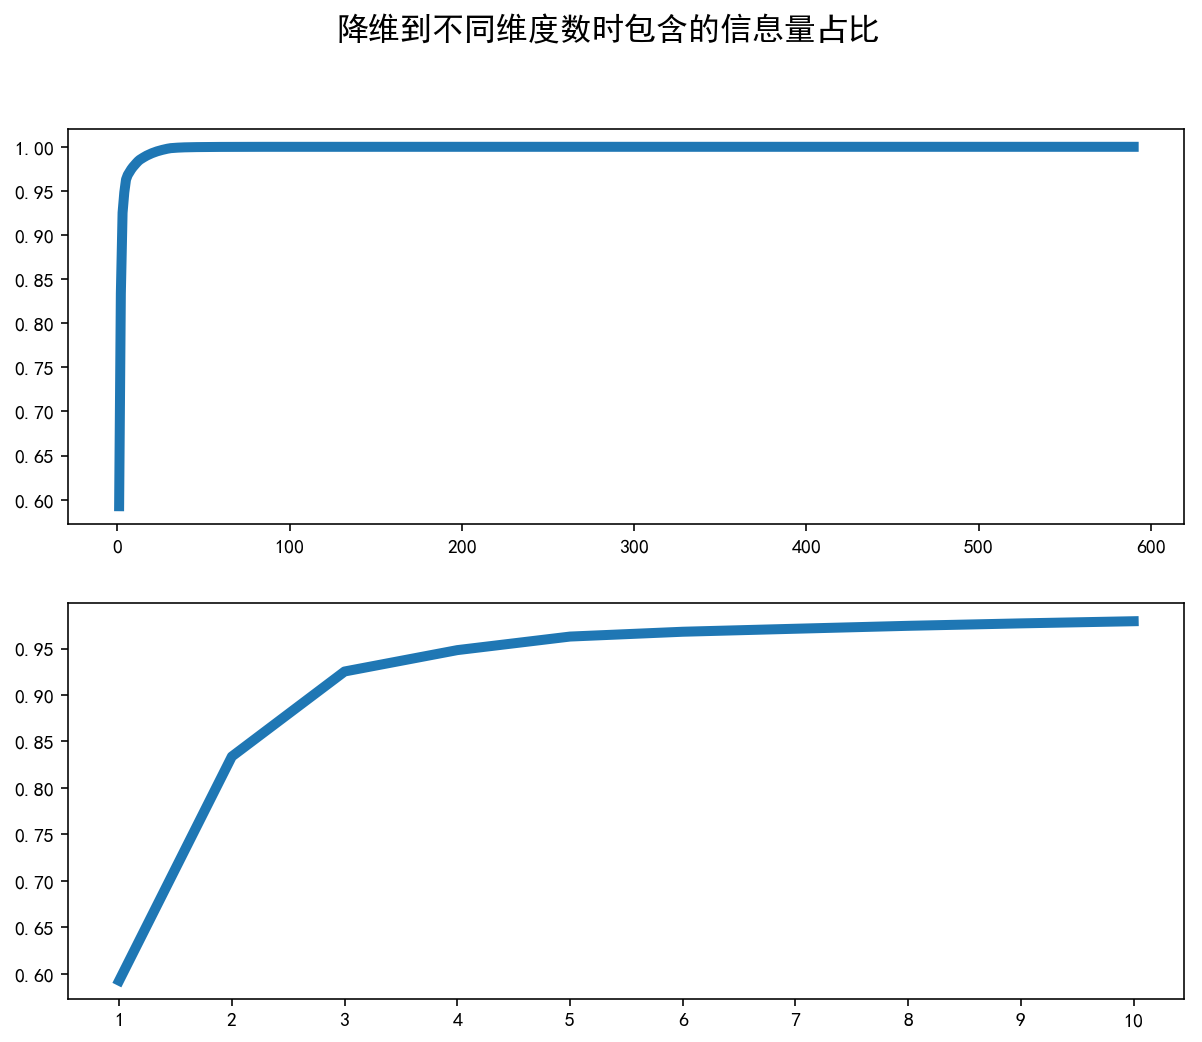

In [132]:
#计算降维后，各特征向量包含的原始数据信息量占比总信息量，并累加，看看降维到不同维度数时包含的信息量占比
ratio=np.cumsum(eigVals[eigValInd])/np.cumsum(eigVals[eigValInd])[-1]
fig=plt.figure(figsize=(10,8))
fig.suptitle("降维到不同维度数时包含的信息量占比",fontsize=16)
ax1=fig.add_subplot(211)
plt.plot(range(1,np.shape(secom_wash)[1]+1,1),ratio,linewidth=5)
ax2=fig.add_subplot(212)
plt.plot(range(1,11,1),ratio[:10],linewidth=5)
plt.xticks(range(1,11,1))
plt.show()

- 可以看到，维度降到3维时，已经包含90%以上的信息了，实际使用中选择降到多少维根据具体需求而定

### 以上过程旨在理解PCA原理，实际使用中可以使用sklearn中的PCA函数完成主成分分析
- sklearn：sklearn.decomposition.PCA(n_components=topNfeat)
- SVD也可以得到协方差矩阵XTX最大的d个特征向量张成的矩阵，但是SVD有个好处，有一些SVD的实现算法可以不求先求出协方差矩阵XTX，也能求出我们的右奇异矩阵V。也就是说，我们的PCA算法可以不用做特征分解，而是做SVD来完成。这个方法在样本量很大的时候很有效。实际上，scikit-learn的PCA算法的背后真正的实现就是用的SVD，而不是我们我们认为的暴力特征分解。